## Heartbeat sounds as input to Neural Network Classifier

This one is not my own work.  This is a local implementation of code written by
![](https://www.kaggle.com/namanj27/seminar-heartbeat-sound-classifier)https://www.kaggle.com/namanj27/seminar-heartbeat-sound-classifier

(The data set is very cool and I wanted to see if I could get implement existing code in my local system. I could and it was awesome)

In [1]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf; print("Tensorflow version.... ",tf.__version__)
import keras ; print("Keras version... ", keras.__version__)

Tensorflow version....  2.2.0
Keras version...  2.3.1


Using TensorFlow backend.


In [66]:
INPUT_DIR = "/Users/celeste/Documents/Heartbeats/Input"

SAMPLE_RATE = 16000

MAX_SOUND_CLIP_DURATION = 12

In [8]:
!pwd
!ls 

/Users/celeste/Documents/Heartbeats
Heartbeats.ipynb Input


In [9]:
set_a = pd.read_csv(INPUT_DIR+'/set_a.csv')
set_a.head()

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [10]:
set_a_timing = pd.read_csv(INPUT_DIR+'/set_a_timing.csv')
set_a_timing.head()

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992

In [11]:
set_b = pd.read_csv(INPUT_DIR+'/set_b.csv')
set_b.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [12]:
frames = [set_a, set_b]
train_ab = pd.concat(frames)
train_ab

dataset                                              fname     label  \
0         a                   set_a/artifact__201012172012.wav  artifact   
1         a                   set_a/artifact__201105040918.wav  artifact   
2         a                   set_a/artifact__201105041959.wav  artifact   
3         a                   set_a/artifact__201105051017.wav  artifact   
4         a                   set_a/artifact__201105060108.wav  artifact   
..      ...                                                ...       ...   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
655       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  
655  noisynormal  

[832 rows x 4 columns]

In [13]:
nb_classes = train_ab.label.unique()

print("number of training examples : ", train_ab.shape[0]," Number of classes : ",len(nb_classes))
print(nb_classes)

number of training examples :  832  Number of classes :  6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


In [14]:
train_ab[train_ab.label == 'nan'].nunique()

Empty DataFrame
Columns: [dataset, fname, label, sublabel]
Index: []

In [15]:
train_ab.label.value_counts()

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

In [16]:
train_ab.groupby(['label','dataset']).count()

fname  sublabel
label      dataset                 
artifact   a           40         0
extrahls   a           19         0
extrastole b           46         0
murmur     a           34         0
           b           95        29
normal     a           31         0
           b          320       120

Text(0, 0.5, 'samples count')

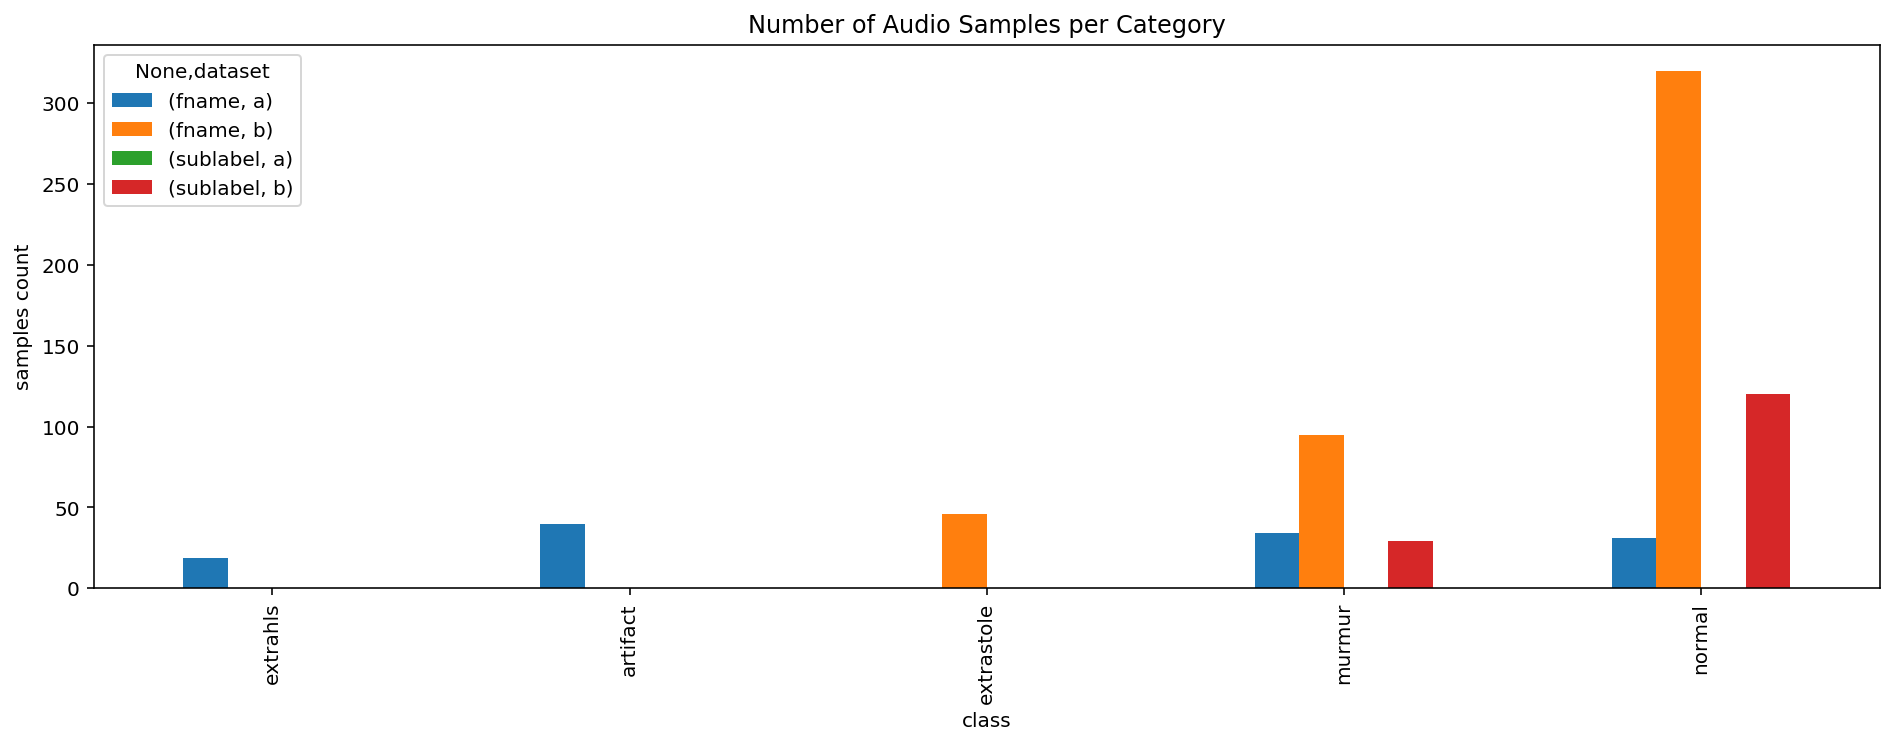

In [17]:
category_group = train_ab.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
        .plot(kind='bar', stacked=False, title="Number of Audio Samples per Category", figsize=(16,5))

plot.set_xlabel('class')
plot.set_ylabel('samples count')

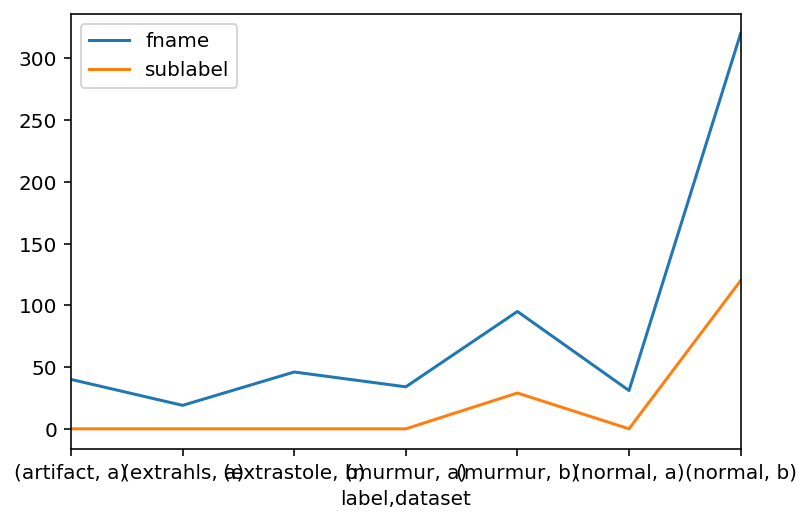

In [18]:
category_group.plot()

In [19]:
print("minimum samples per class :", min(train_ab.label.value_counts()))
print("maximum samples per class :",max(train_ab.label.value_counts()))

minimum samples per class : 19
maximum samples per class : 351


In [28]:
normal_file = 'Input/set_a/normal__201101070538.wav'

In [30]:
from scipy.io import wavfile
rate, signal = wavfile.read(normal_file)
print("Sampling Rate. ",rate)
print("Total samples  ",signal.shape[0])
print("Duration in seconds. ",signal.shape[0]/rate)
print(signal)

Sampling Rate.  44100
Total samples   391787
Duration in seconds.  8.8840589569161
[ 14  17  14 ... -61 -75 -64]


In [49]:
import IPython.display as ipd
ipd.Audio(normal_file)
#print(normal_file)

Text(0.5, 1.0, 'Normal')

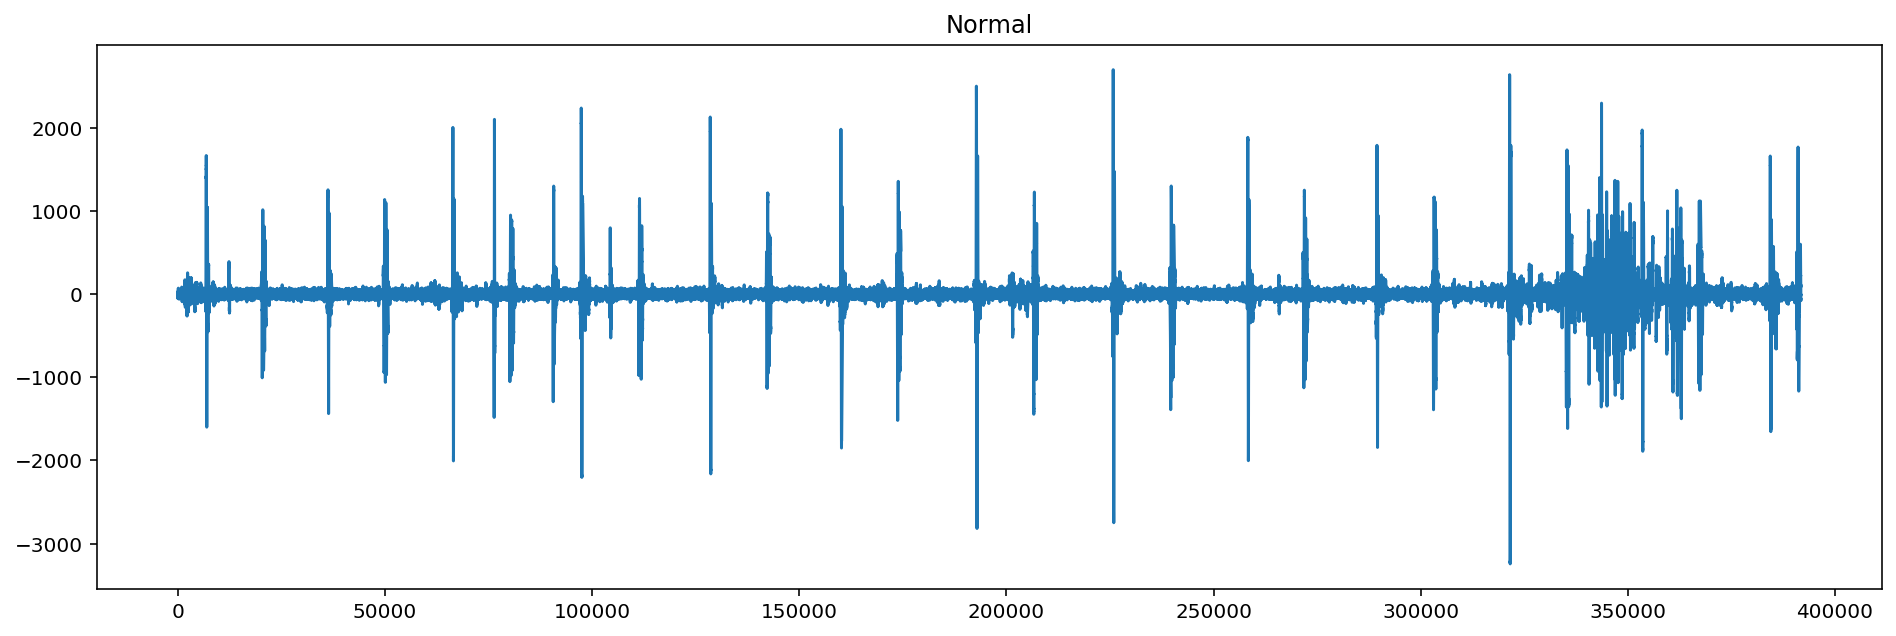

In [32]:
plt.figure(figsize=(16,5))
plt.plot(signal, '-',)
plt.title('Normal')

In [33]:
signal1, rate1 = librosa.load(normal_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(signal1)
print("Duration in seconds. ",librosa.get_duration(signal1))
print(signal1.shape, rate1)

Duration in seconds.  5.0
(110250,) 22050


Text(0.5, 1.0, 'Normal')

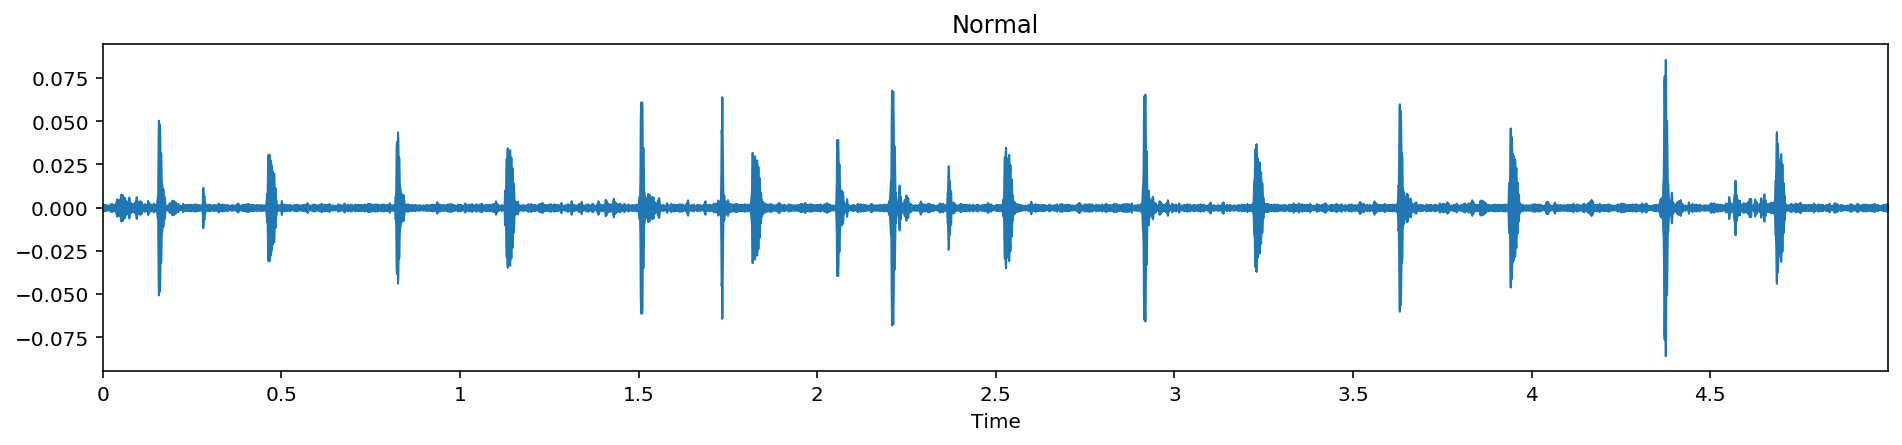

In [34]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(signal1)
plt.title("Normal")

In [35]:
murmur_file = 'Input/set_a/murmur__201108222236.wav'
ipd.Audio(murmur_file)

In [36]:
signal2, rate2 = librosa.load(murmur_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(signal2)
print("Duration in seconds. ",librosa.get_duration(signal2))
print(signal2.shape, rate2)

Duration in seconds.  5.0
(110250,) 22050


Text(0.5, 1.0, 'murmur')

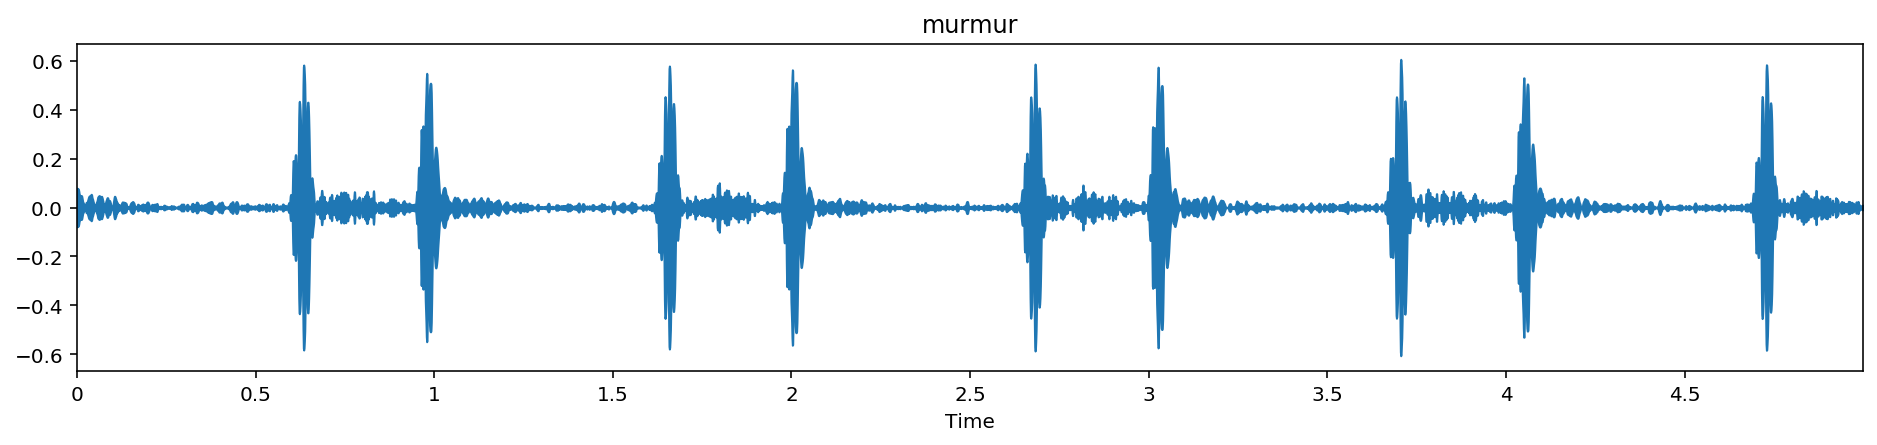

In [37]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(signal2)
plt.title("murmur")

In [39]:
extrasystole_file = 'Input/set_b/extrastole__198_1308141739338_B1.wav'
ipd.Audio(extrasystole_file)

In [40]:
signal3, rate3 = librosa.load(extrasystole_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(signal3)
print("Duration in seconds. ",librosa.get_duration(signal3))
print(signal3.shape, rate3)

Duration in seconds.  5.0
(110250,) 22050


Text(0.5, 1.0, 'Extrasystole')

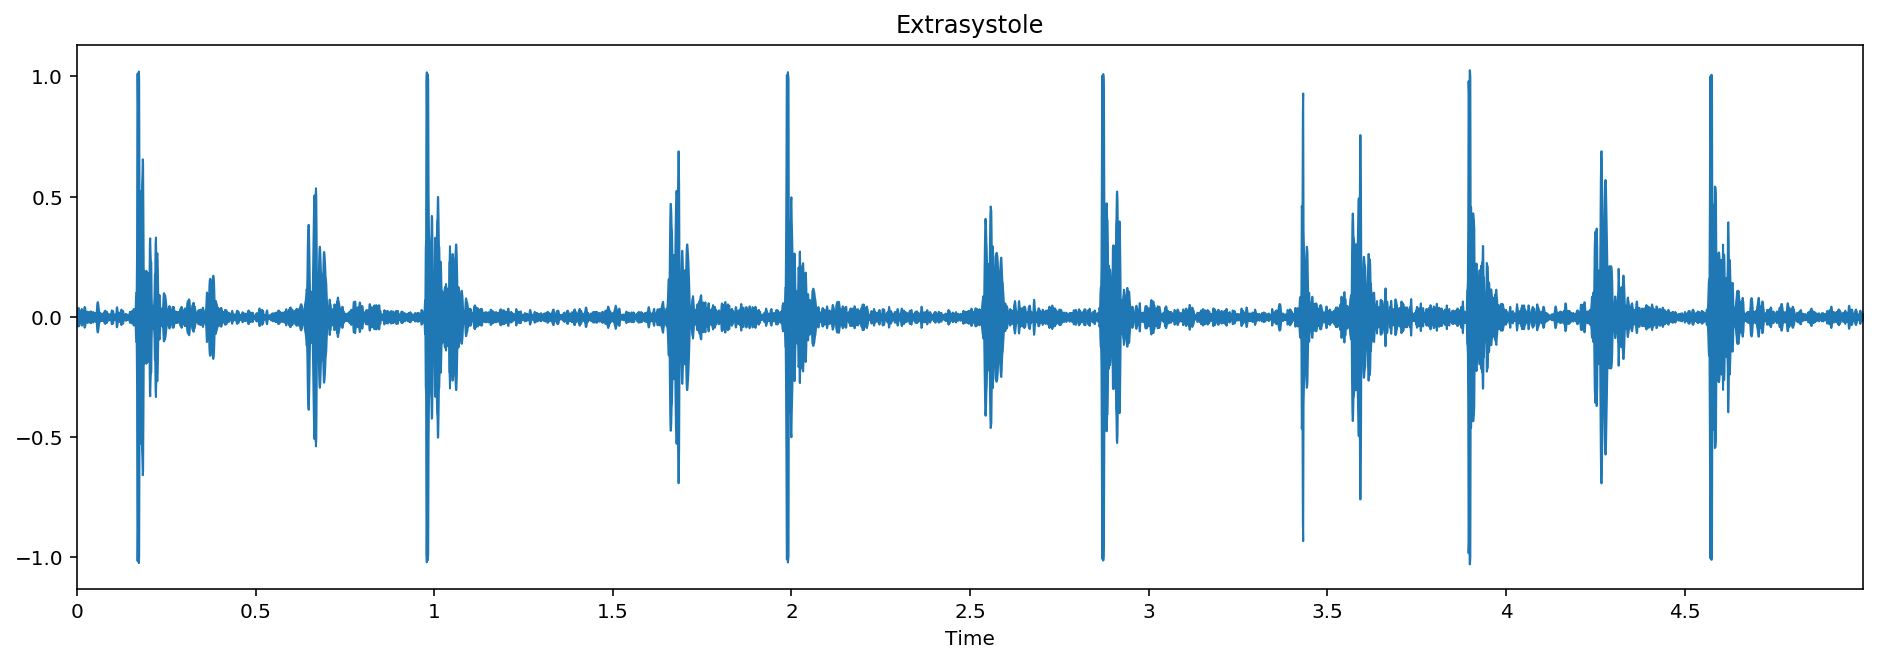

In [41]:
plt.figure(figsize=(16,5))
librosa.display.waveplot(signal3)
plt.title('Extrasystole')

In [43]:
artifact_file = 'Input/set_a/artifact__201012172012.wav'
ipd.Audio(artifact_file)

In [44]:
signal4, rate4 = librosa.load(artifact_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(signal4)
print("Duration in seconds. ",librosa.get_duration(signal4))
print(signal4.shape, rate4)

Duration in seconds.  5.0
(110250,) 22050


Text(0.5, 1.0, 'Artifact')

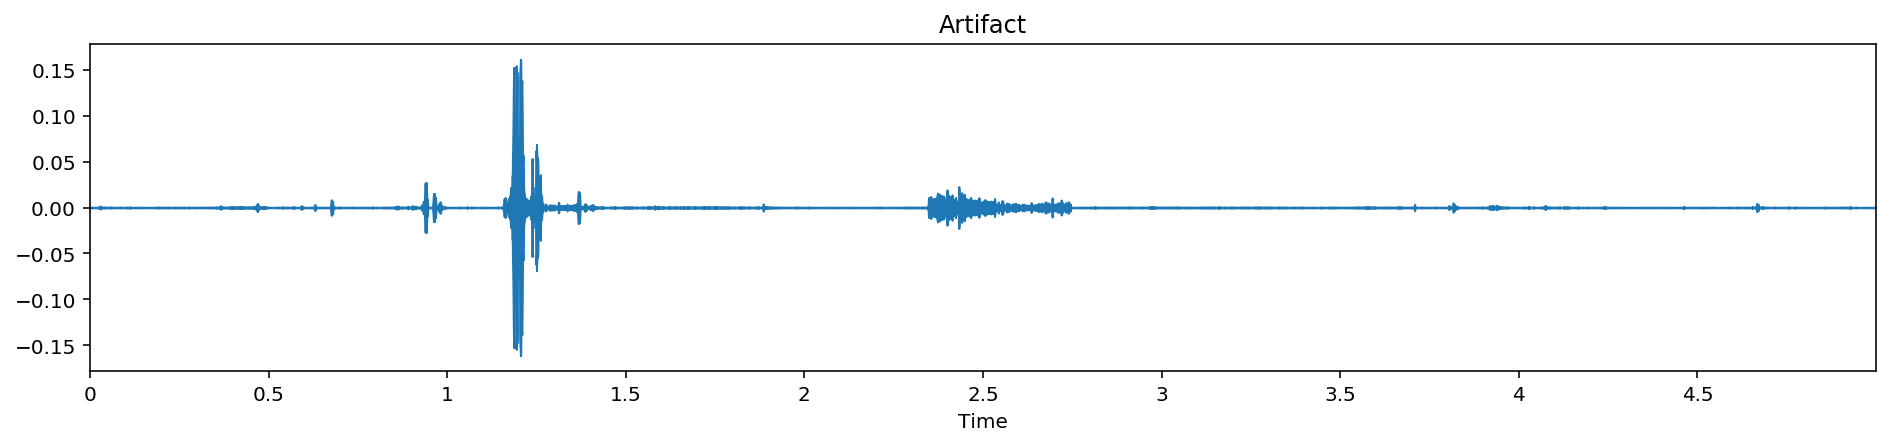

In [45]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(signal4)
plt.title("Artifact")

In [46]:
extrahls_file = 'Input/set_a/extrahls__201101070953.wav'
ipd.Audio(extrahls_file)

In [47]:
signal5, rate5 = librosa.load(extrahls_file, duration=5)
print("Duration ",librosa.get_duration(signal5))
print(signal5.shape, rate5)

Duration  5.0
(110250,) 22050


Text(0.5, 1.0, 'Extra Heart Sound')

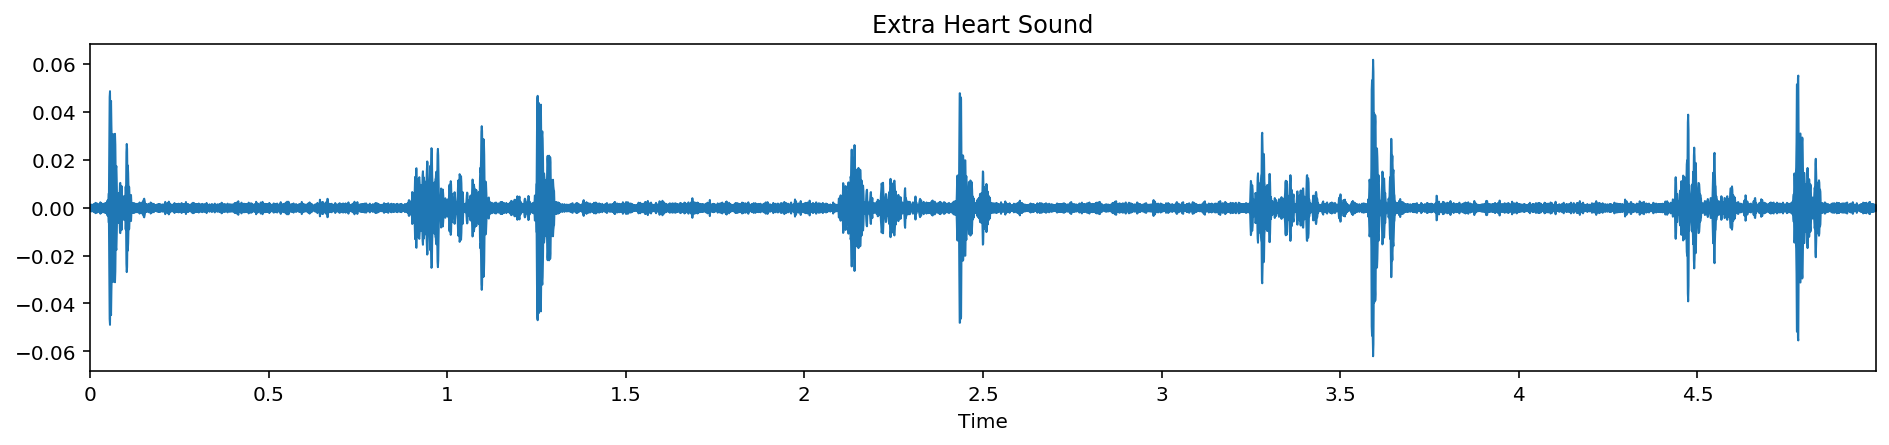

In [48]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(signal5, sr = rate5)
plt.title("Extra Heart Sound")

In [50]:
normal_file
signal, rate = librosa.load(normal_file)
mfcc = librosa.feature.mfcc(y=signal, sr = rate)
print(mfcc.shape)

(20, 383)


In [51]:
mfcc

array([[-518.2946   , -498.763    , -486.61652  , ..., -491.18152  ,
        -417.15768  , -400.62518  ],
       [  50.480797 ,   69.88107  ,   80.96759  , ...,   72.75497  ,
         111.06619  ,  117.573204 ],
       [  -2.6641545,    8.817115 ,   15.921576 , ...,    6.478533 ,
          20.603645 ,   29.33733  ],
       ...,
       [  -3.7151349,   -7.8375735,   -8.347091 , ...,    1.2803435,
           2.305305 ,    1.767051 ],
       [ -12.113075 ,  -10.746837 ,   -9.509184 , ...,   -3.9956725,
          -7.9250813,   -5.974185 ],
       [  -1.4589536,   -4.8668756,   -6.0949926, ...,    4.410071 ,
           3.7909002,    2.083803 ]], dtype=float32)

In [52]:
S = librosa.feature.melspectrogram(y=signal, sr=rate, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print (log_S)

[[-508.58722    -486.3006     -473.39957    ... -479.03748
  -397.97113    -381.89838   ]
 [  39.904118     61.720222     73.54567    ...   64.5112
    99.63705     107.99851   ]
 [   4.03422      15.734038     23.154953   ...   11.270202
    30.538282     38.098843  ]
 ...
 [  -4.992493     -7.61333      -8.489024   ...    0.7913422
     0.81857455    1.0155382 ]
 [  -3.6996343    -9.701344    -10.626079   ...   -0.6086781
    -8.455053     -9.625948  ]
 [   1.4269896    -4.3233414    -9.075686   ...   -1.1071188
    -2.3686895    -2.4557805 ]]


In [53]:
mfcc = librosa.feature.mfcc(y = signal, sr = rate, n_mfcc = 40)

In [54]:
print(mfcc.reshape([-1,1]).shape)

(15320, 1)


In [55]:
40*345

13800

# Visualizing MFCC series 

mel frequency cepstral coefficients (mfcc) which is by far the best way to numerically represent audio signal for ML related tasks

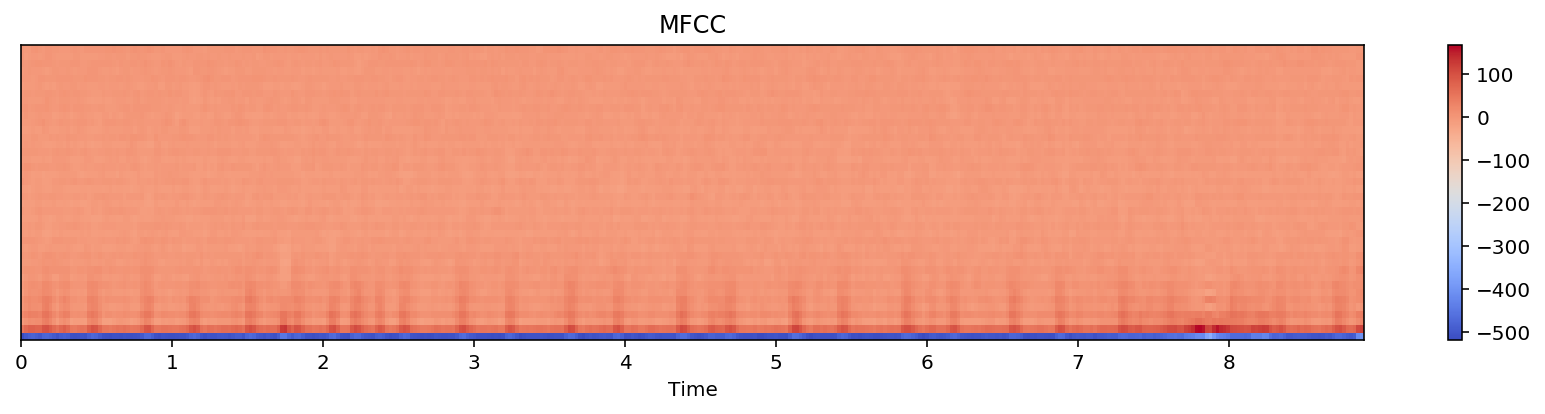

In [56]:
plt.figure(figsize(12,3))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.tight_layout()

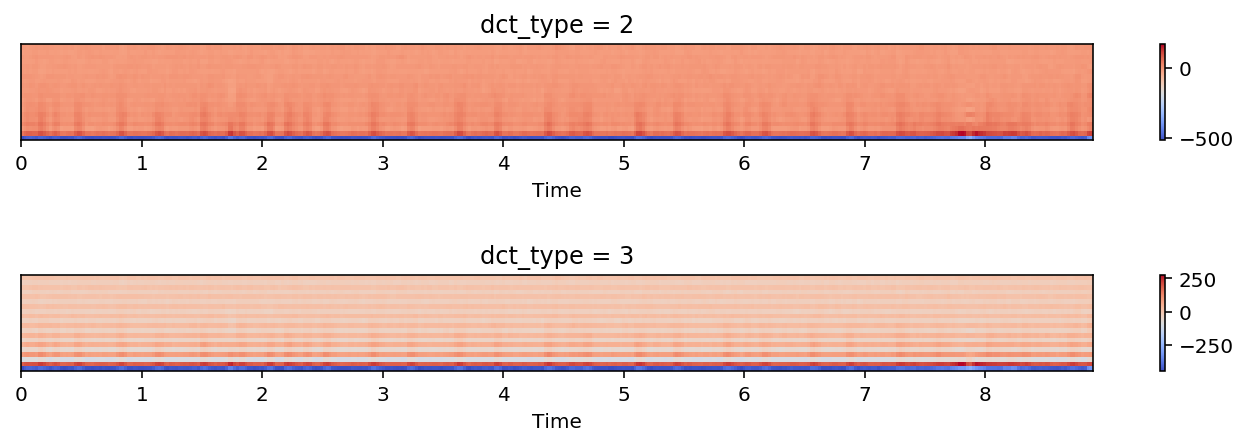

In [57]:
m_slaney = librosa.feature.mfcc(y=signal, sr=rate, dct_type=2)
plt.figure(figsize=(12,3))

m_htk = librosa.feature.mfcc(y=signal, sr=rate, dct_type=3)
plt.subplot(3,1,1)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title("dct_type = 2")
plt.colorbar()
plt.subplot(3,1,3)
librosa.display.specshow(m_htk, x_axis='time')
plt.title("dct_type = 3")
plt.colorbar()

## Loading data

In [58]:
train_ab

dataset                                              fname     label  \
0         a                   set_a/artifact__201012172012.wav  artifact   
1         a                   set_a/artifact__201105040918.wav  artifact   
2         a                   set_a/artifact__201105041959.wav  artifact   
3         a                   set_a/artifact__201105051017.wav  artifact   
4         a                   set_a/artifact__201105060108.wav  artifact   
..      ...                                                ...       ...   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
655       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  
655  noisynormal  

[832 rows x 4 columns]

In [59]:
print("Number of training examples : ",train_ab.shape[0], " Number of classes : ", train_ab.label.nunique())

Number of training examples :  832  Number of classes :  5


In [60]:
def audio_norm(data):
    max_data = max(data)
    min_data = min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

In [61]:
def load_file_data (folder_name,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder_name+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            X = audio_norm(X)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

CLASSES = ['artifact','murmur','normal']
NB_CLASSES = len(CLASSES)

label_to_int = {k:v for v,k in enumerate(CLASSES)}
print(label_to_int)
print(" ")

int_to_label = {v:k for v,k in enumerate(CLASSES)}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [72]:
# Loading dataset a

import os, fnmatch

A_folder = INPUT_DIR+'/set_a/'

A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a/'),'artifact*.wav')
A_artifact_sounds = load_file_data(folder_name=A_folder, file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a/'), 'normal*.wav')
A_normal_sounds = load_file_data(folder_name = A_folder, file_names = A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_files]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a/'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder_name=A_folder, file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_files]

A_murmur_files= fnmatch.filter(os.listdir(INPUT_DIR+'/set_a/'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder_name=A_folder, file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a/'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder_name=A_folder, file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_files]

print("loaded dataset-a")

load file  /Users/celeste/Documents/Heartbeats/Input/set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/artifact__201106010559.wav
fixing audio lenght : artifact__201106010559.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/artifact__201106141701.wav
fixing audio lenght : artifact__201106141701.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/artifact__201106070537.wav
fixing audio lenght : artifact__201106070537.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/artifact__201106161016.wav
fixing audio lenght : artifact__201106161016.wav
load file  /Users/celeste/Documents/Heartbeats/Input/se

fixing audio lenght : normal__201103140135.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/normal__201101151127.wav
fixing audio lenght : normal__201101151127.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/normal__201105021804.wav
fixing audio lenght : normal__201105021804.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/normal__201102260502.wav
fixing audio lenght : normal__201102260502.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/normal__201108011118.wav
fixing audio lenght : normal__201108011118.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/normal__201106221450.wav
fixing audio lenght : normal__201106221450.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/normal__201103170121.wav
fixing audio lenght : normal__201103170121.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/normal__201102081152.wav
fixing audio lenght : normal__201102081152.wav
load file  /Users/celeste/Documents/

load file  /Users/celeste/Documents/Heartbeats/Input/set_a/Aunlabelledtest__201106061215.wav
fixing audio lenght : Aunlabelledtest__201106061215.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/Aunlabelledtest__201012172010.wav
fixing audio lenght : Aunlabelledtest__201012172010.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/Aunlabelledtest__201108011117.wav
fixing audio lenght : Aunlabelledtest__201108011117.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/Aunlabelledtest__201101091156.wav
fixing audio lenght : Aunlabelledtest__201101091156.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/Aunlabelledtest__201108011116.wav
fixing audio lenght : Aunlabelledtest__201108011116.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/Aunlabelledtest__201101152256.wav
fixing audio lenght : Aunlabelledtest__201101152256.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_a/Aunlabelledtest__201106100606.wav
fixing audio 

In [73]:


B_folder = INPUT_DIR+'/set_b/'


B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b/'), 'normal*.wav')
B_normal_sounds = load_file_data(folder_name = B_folder, file_names = B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b/'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder_name=B_folder, file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

B_murmur_files= fnmatch.filter(os.listdir(INPUT_DIR+'/set_b/'), 'murmur*.wav')
B_murmur_sounds = load_file_data(folder_name=B_folder, file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b/'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder_name=B_folder, file_names= B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_files]

print("loaded dataset-b")

load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__232_1308748524018_D1.wav
fixing audio lenght : normal__232_1308748524018_D1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__184_1308073010307_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_109_1305653972028_F.wav
fixing audio lenght : normal_noisynormal_109_1305653972028_F.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_264_1309356143724_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_109_1305653646620_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_173_1307973611151_C1.wav
fixing audio lenght : normal_noisynormal_173_1307973611151_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_115_1306259437619_B.wav
fixing audio lenght : normal_noisynormal_115_1306259437619_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/se

fixing audio lenght : normal__149_1306776016110_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_172_1307971284351_A.wav
fixing audio lenght : normal_noisynormal_172_1307971284351_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__173_1307973611151_B.wav
fixing audio lenght : normal__173_1307973611151_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__286_1311170606028_A1.wav
fixing audio lenght : normal__286_1311170606028_A1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__176_1307988171173_A.wav
fixing audio lenght : normal__176_1307988171173_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_216_1308245839516_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_296_1311682952647_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__173_1307973611151_C.wav
fixing audio lenght : normal__173_130797361115

load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__278_1311163365896_A1.wav
fixing audio lenght : normal__278_1311163365896_A1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__146_1306778707532_D1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__103_1305031931979_D1.wav
fixing audio lenght : normal__103_1305031931979_D1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_147_1306523973811_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__107_1305654946865_C1.wav
fixing audio lenght : normal__107_1305654946865_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_170_1307970562729_C1.wav
fixing audio lenght : normal_noisynormal_170_1307970562729_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__286_1311170606028_C.wav
fixing audio lenght : normal__286_1311170606028_C.wav
load file  /Users/celeste/Documents/Heartbeats/Inpu

load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__179_1307990076841_D.wav
fixing audio lenght : normal__179_1307990076841_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_178_1307989887769_B1.wav
fixing audio lenght : normal_noisynormal_178_1307989887769_B1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__258_1309352253234_C.wav
fixing audio lenght : normal__258_1309352253234_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__274_1311075637574_B.wav
fixing audio lenght : normal__274_1311075637574_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__177_1307989650056_D1.wav
fixing audio lenght : normal__177_1307989650056_D1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__294_1311681084248_A.wav
fixing audio lenght : normal__294_1311681084248_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_137_1306764999211_A2.wav
f

load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_138_1306762146980_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__128_1306344005749_B.wav
fixing audio lenght : normal__128_1306344005749_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__106_1306776721273_C1.wav
fixing audio lenght : normal__106_1306776721273_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_133_1306759619127_B1.wav
fixing audio lenght : normal_noisynormal_133_1306759619127_B1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__168_1307970069434_A2.wav
fixing audio lenght : normal__168_1307970069434_A2.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_169_1307970398039_A.wav
fixing audio lenght : normal_noisynormal_169_1307970398039_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__137_1306764999211_D.wav
fixing audio lenght : normal__13

fixing audio lenght : normal_noisynormal_113_1306244002866_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__126_1306777102824_B.wav
fixing audio lenght : normal__126_1306777102824_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal__137_1306764999211_C.wav
fixing audio lenght : normal__137_1306764999211_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_125_1306332456645_D.wav
fixing audio lenght : normal_noisynormal_125_1306332456645_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_154_1306935608852_C.wav
fixing audio lenght : normal_noisynormal_154_1306935608852_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_132_1306758754432_B1.wav
fixing audio lenght : normal_noisynormal_132_1306758754432_B1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/normal_noisynormal_133_1306759619127_D1.wav
fixing audio lenght : normal_noisynorma

fixing audio lenght : extrastole__128_1306344005749_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/extrastole__154_1306935608852_D2.wav
fixing audio lenght : extrastole__154_1306935608852_D2.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/extrastole__179_1307990076841_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/extrastole__144_1306522408528_B1.wav
fixing audio lenght : extrastole__144_1306522408528_B1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/extrastole__265_1309367698923_C.wav
fixing audio lenght : extrastole__265_1309367698923_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/extrastole__261_1309353556003_C.wav
fixing audio lenght : extrastole__261_1309353556003_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/extrastole__274_1311075637574_A.wav
fixing audio lenght : extrastole__274_1311075637574_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/extrastole__207_130

load file  /Users/celeste/Documents/Heartbeats/Input/set_b/murmur__112_1306243000964_A.wav
fixing audio lenght : murmur__112_1306243000964_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/murmur__165_1307109069581_C.wav
fixing audio lenght : murmur__165_1307109069581_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/murmur__248_1309201683806_C.wav
fixing audio lenght : murmur__248_1309201683806_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/murmur__197_1308141235553_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/murmur__203_1308162026258_C1.wav
fixing audio lenght : murmur__203_1308162026258_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/murmur_noisymurmur_135_1306428972976_A.wav
fixing audio lenght : murmur_noisymurmur_135_1306428972976_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/murmur__162_1307101835989_B.wav
fixing audio lenght : murmur__162_1307101835989_B.wav
load file  /Use

fixing audio lenght : Bunlabelledtest__237_1308750231222_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__294_1311681084248_D.wav
fixing audio lenght : Bunlabelledtest__294_1311681084248_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__161_1307101199321_D.wav
fixing audio lenght : Bunlabelledtest__161_1307101199321_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__113_1306244002866_C.wav
fixing audio lenght : Bunlabelledtest__113_1306244002866_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__154_1306935608852_A.wav
fixing audio lenght : Bunlabelledtest__154_1306935608852_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__159_1307018640315_C.wav
fixing audio lenght : Bunlabelledtest__159_1307018640315_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__203_1308162026258_C.wav
fixing audio lenght :

load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__106_1306776721273_D.wav
fixing audio lenght : Bunlabelledtest__106_1306776721273_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__197_1308141235553_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__122_1306325762831_A.wav
fixing audio lenght : Bunlabelledtest__122_1306325762831_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__160_1307100683334_C.wav
fixing audio lenght : Bunlabelledtest__160_1307100683334_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__268_1309368960960_E.wav
fixing audio lenght : Bunlabelledtest__268_1309368960960_E.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__126_1306777102824_C1.wav
fixing audio lenght : Bunlabelledtest__126_1306777102824_C1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__300_131

fixing audio lenght : Bunlabelledtest__132_1306758754432_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__213_1308245263936_B.wav
fixing audio lenght : Bunlabelledtest__213_1308245263936_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__146_1306778707532_D31.wav
fixing audio lenght : Bunlabelledtest__146_1306778707532_D31.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__242_1309197394064_A.wav
fixing audio lenght : Bunlabelledtest__242_1309197394064_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__204_1308159229275_B1.wav
fixing audio lenght : Bunlabelledtest__204_1308159229275_B1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__143_1306763822290_D.wav
fixing audio lenght : Bunlabelledtest__143_1306763822290_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__105_1305033453095_B.wav
fixing audio len

load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__264_1309356143724_A.wav
fixing audio lenght : Bunlabelledtest__264_1309356143724_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__148_1306768801551_A.wav
fixing audio lenght : Bunlabelledtest__148_1306768801551_A.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__231_1308748318393_B.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__231_1308748318393_C.wav
fixing audio lenght : Bunlabelledtest__231_1308748318393_C.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__154_1306935608852_D1.wav
fixing audio lenght : Bunlabelledtest__154_1306935608852_D1.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__109_1305653972028_D.wav
fixing audio lenght : Bunlabelledtest__109_1305653972028_D.wav
load file  /Users/celeste/Documents/Heartbeats/Input/set_b/Bunlabelledtest__141_130

In [74]:
### Combining set-a set-b

x_data = np.concatenate((A_artifact_sounds, A_normal_sounds, A_extrahls_sounds, A_murmur_sounds,
                        B_normal_sounds,B_murmur_sounds, B_extrastole_sounds))
y_data = np.concatenate((A_artifact_labels, A_normal_labels, A_extrahls_labels, A_murmur_labels,
                        B_normal_labels,B_murmur_labels, B_extrastole_labels))

x_unlabelled = np.concatenate((A_unlabelledtest_sounds, B_unlabelledtest_sounds))
y_unlabelled = np.concatenate((A_unlabelledtest_labels, B_unlabelledtest_labels))

print("Combined data size : ",len(x_data), " and unlabelled ",len(x_unlabelled))


Combined data size :  585  and unlabelled  247


In [76]:
seed = 1000

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, train_size=0.8,random_state=seed, shuffle=True)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state = seed, shuffle=True)

y_train = np.array(keras.utils.to_categorical(y_train, len(CLASSES)))
# y_test = np.array(keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(keras.utils.to_categorical(y_val, len(CLASSES)))
y_unlabelled = np.array(keras.utils.to_categorical(y_unlabelled, len(CLASSES)))

In [90]:
y_unlabelledt= y_unlabelled.sum(axis= -1)

In [91]:
y_unlabelledt.shape

(247, 3)

In [78]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
# print ("")
# print ("test data shape: ", x_test.shape)
# print ("test label shape: ", y_test.shape)
print("")
print ("unlabelled data shape: ", x_unlabelled.shape)
print ("unlabelled label shape: ", y_unlabelled.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4680
0

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

training data shape:  (468, 40, 1)
training label shape:  (468, 3)

validation data shape:  (117, 40, 1)
validation label shape:  (117, 3)

unlabelled data shape:  (247, 40, 1)
unlabelled label shape:  (247, 3, 3)


label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4680
0

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

training data shape:  (468, 40, 1)
training label shape:  (468, 3)

validation data shape:  (117, 40, 1)
validation label shape:  (117, 3)

unlabelled data shape:  (247, 40, 1)
unlabelled label shape:  (247, 3)

In [92]:
y_unlabelled= y_unlabelledt

In [80]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
from keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

from livelossplot import PlotLossesKeras

In [82]:
model = Sequential()
model.add(Bidirectional(LSTM(units=64, dropout=0.2, return_sequences=True), input_shape=(40,1)))
model.add(Bidirectional(LSTM(units=32, dropout=0.2, return_sequences=False)))
model.add(Dense(len(CLASSES), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', 
             metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 40, 128)           33792     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 75,203
Trainable params: 75,203
Non-trainable params: 0
_________________________________________________________________


In [98]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [103]:
max_patience = 6
max_epochs = 100
max_batch = 32

early_stopping = EarlyStopping(monitor='val_accuracy', patience = max_patience, verbose=0, mode='max', 
                               restore_best_weights=False)

#callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=5, min_lr=0.00001),
#          early_stopping,
#        PlotLossesKeras()]

print("training started..")
history = model.fit(x_train, y_train,
                   batch_size=max_batch,
                   epochs=max_epochs,
                   verbose=1,
                   validation_data=(x_val, y_val),
                   callbacks= [early_stopping])

training started..
Train on 468 samples, validate on 117 samples
Epoch 1/100
468/468 [==============================] - 1s 1ms/step - loss: 0.3903 - acc: 0.8397 - val_loss: 1.0059 - val_acc: 0.6068
Epoch 2/100
468/468 [==============================] - 1s 1ms/step - loss: 0.3442 - acc: 0.8333 - val_loss: 1.0524 - val_acc: 0.6239
Epoch 3/100
468/468 [==============================] - 1s 1ms/step - loss: 0.3426 - acc: 0.8504 - val_loss: 1.1780 - val_acc: 0.5812
Epoch 4/100
468/468 [==============================] - 1s 1ms/step - loss: 0.3596 - acc: 0.8397 - val_loss: 1.0857 - val_acc: 0.6239
Epoch 5/100
468/468 [==============================] - 1s 1ms/step - loss: 0.3362 - acc: 0.8697 - val_loss: 1.1283 - val_acc: 0.5983
Epoch 6/100
468/468 [==============================] - 1s 1ms/step - loss: 0.3281 - acc: 0.8419 - val_loss: 1.1653 - val_acc: 0.5726
Epoch 7/100
468/468 [==============================] - 1s 1ms/step - loss: 0.3304 - acc: 0.8632 - val_loss: 1.0981 - val_acc: 0.6239
Epoc

Epoch 62/100
468/468 [==============================] - 1s 1ms/step - loss: 0.1789 - acc: 0.9209 - val_loss: 1.3379 - val_acc: 0.6581
Epoch 63/100
468/468 [==============================] - 1s 1ms/step - loss: 0.1660 - acc: 0.9167 - val_loss: 1.5566 - val_acc: 0.5983
Epoch 64/100
468/468 [==============================] - 1s 1ms/step - loss: 0.1733 - acc: 0.9274 - val_loss: 1.5612 - val_acc: 0.5983
Epoch 65/100
468/468 [==============================] - 1s 1ms/step - loss: 0.1610 - acc: 0.9316 - val_loss: 1.4596 - val_acc: 0.6410
Epoch 66/100
468/468 [==============================] - 1s 1ms/step - loss: 0.1545 - acc: 0.9402 - val_loss: 1.4465 - val_acc: 0.6325
Epoch 67/100
468/468 [==============================] - 1s 1ms/step - loss: 0.1551 - acc: 0.9359 - val_loss: 1.5985 - val_acc: 0.6410
Epoch 68/100
468/468 [==============================] - 1s 1ms/step - loss: 0.1435 - acc: 0.9466 - val_loss: 1.5704 - val_acc: 0.6325
Epoch 69/100
468/468 [==============================] - 1s 1ms

In [104]:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

# score = model.evaluate(x_test, y_test, verbose=0) 
# print ("model test{split} data score : ",round(score[1]*100) , "%")

score = model.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

score = model.evaluate(x_unlabelled, y_unlabelled, verbose=0) 
print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  87 %
model validation data score  :  63 %
model unlabeled data score   :  6 %
